<a href="https://colab.research.google.com/github/alamau01/Thesis-in-EE/blob/master/Stock_Price_Prediction_LSTM_Keras_APPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

dataset = web.DataReader('AAPL', data_source = 'yahoo', start = '2000-01-01', end = '2020-04-30')
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.470226
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.177650
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.224152
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.945139
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.084645
...,...,...,...,...,...,...
2020-04-24,283.010010,277.000000,277.200012,282.970001,31627200.0,282.970001
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987


In [0]:
dataset.shape


(5114, 6)

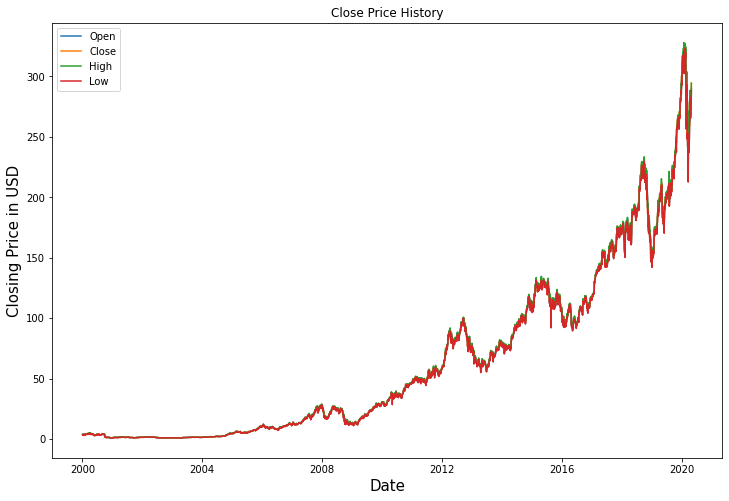

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(dataset['Open'])
plt.plot(dataset['Close'])
plt.plot(dataset['High'])
plt.plot(dataset['Low'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price in USD', fontsize = 15)
plt.title('Close Price History')
plt.legend(['Open', 'Close', 'High', 'Low'], loc = 'upper left')
plt.show()

In [0]:
close_price = dataset.filter(['Close']).values
data_train_len = math.ceil(len(close_price) * .8)

sc = MinMaxScaler(feature_range = (0, 1))
sc_data = sc.fit_transform(close_price)

data_train = sc_data[0 : data_train_len, : ]
xtrain = []
ytrain = []
for i in range(60, len(data_train)):
    xtrain.append(data_train[i - 60 : i, 0])
    ytrain.append(data_train[i, 0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtrain.shape

(4032, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(units = 512, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xtrain, ytrain, batch_size = 128, epochs = 150)

Epoch 1/150
32/32 [==============================] - 2s 76ms/step - loss: 0.0045
Epoch 2/150
32/32 [==============================] - 2s 76ms/step - loss: 1.3323e-04
Epoch 3/150
32/32 [==============================] - 2s 76ms/step - loss: 9.6788e-05
Epoch 4/150
32/32 [==============================] - 2s 76ms/step - loss: 9.4790e-05
Epoch 5/150
32/32 [==============================] - 2s 76ms/step - loss: 8.9508e-05
Epoch 6/150
32/32 [==============================] - 2s 76ms/step - loss: 1.0701e-04
Epoch 7/150
32/32 [==============================] - 2s 76ms/step - loss: 1.6005e-04
Epoch 8/150
32/32 [==============================] - 2s 76ms/step - loss: 8.9983e-05
Epoch 9/150
32/32 [==============================] - 2s 77ms/step - loss: 7.5886e-05
Epoch 10/150
32/32 [==============================] - 2s 76ms/step - loss: 6.7437e-05
Epoch 11/150
32/32 [==============================] - 2s 75ms/step - loss: 5.8584e-05
Epoch 12/150
32/32 [==============================] - 2s 75ms/step 

In [0]:
data_test = sc_data[data_train_len - 60 : , :]
xtest = []
ytest = close_price[data_train_len :, :]
for i in range(60, len(data_test)):
    xtest.append(data_test[i - 60 : i, 0])

xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [0]:
close_price_pred = model.predict(xtest)
close_price_pred = sc.inverse_transform(close_price_pred)
rmse_score = np.sqrt(np.mean(((close_price_pred - ytest) ** 2)))
rmse_score

4.605035365368506

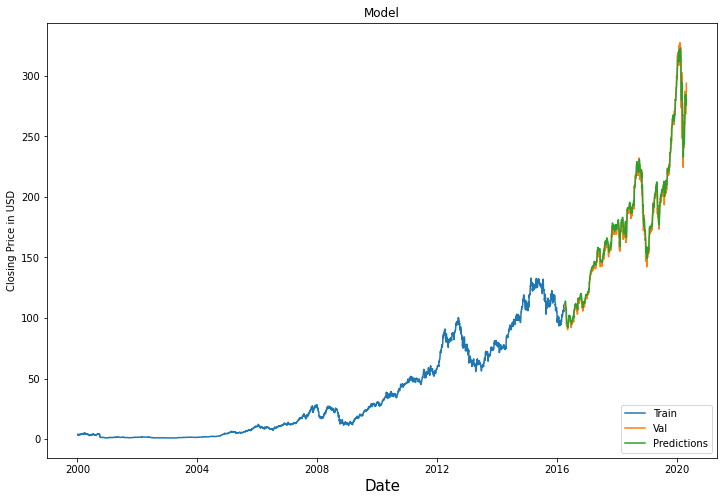

1022
1022


In [0]:
train = dataset.filter(['Close'])[: data_train_len]
valid = dataset.filter(['Close'])[data_train_len :]
valid['Predictions'] = close_price_pred

plt.figure(figsize = (12, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price in USD')
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.title('Model')
plt.show()

print(len(valid))
print(len(close_price_pred))

In [0]:
valid

,Close,Predictions
Date,,
2016-04-11,109.019997,111.564819
2016-04-12,110.440002,111.391182
2016-04-13,112.040001,111.979637
2016-04-14,112.099998,113.162163
2016-04-15,109.849998,114.040749
...,...,...
2020-04-24,282.970001,276.483551
2020-04-27,283.170013,280.257385
2020-04-28,278.579987,283.182648


In [0]:
apple_stock_price = web.DataReader('AAPL', data_source = 'yahoo', start = '2000-01-01', end = '2020-04-30')
new_dataset = apple_stock_price.filter(['Close'])
last_60_days = new_dataset[-60 :].values
last_60_days_sc = sc.transform(last_60_days)
xtest1 = []
xtest1.append(last_60_days_sc)
xtest1 = np.array(xtest1)
xtest1 = np.reshape(xtest1, (xtest1.shape[0], xtest1.shape[1], 1))
pred_price = model.predict(xtest1)
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[288.11166]]


In [0]:
apple_stock_2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-05-01', end = '2020-05-02')
print(apple_stock_2['Close'])

Date
2020-05-01    289.070007
2020-05-01    289.070007
Name: Close, dtype: float64
